In [0]:
import numpy as np
import re, string
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from gensim.models import Word2Vec
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
from collections import defaultdict
import spacy
from sklearn.manifold import TSNE

In [0]:
df = pd.read_csv('BBC_news_dataset.csv')

In [0]:
def clean_text(text):
    
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    
    if len(text) > 2:
        return ' '.join(word for word in text.split() if word not in STOPWORDS)

In [0]:
df_clean = pd.DataFrame(df.description.apply(lambda x: clean_text(x)))

In [0]:
nlp = spacy.load('en', disable=['ner', 'parser']) 

def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

In [0]:
df_clean["text_lemmatize_clean"] = df_clean["text_lemmatize"].str.replace('-PRON-', '')

In [0]:
df_clean.head()

,description,text_lemmatize
0,chelsea sack mutu chelsea sacked adrian mutu f...,chelsea sack mutu chelsea sack adrian mutu fai...
1,record fails lift lacklustre meet yelena isinb...,record fail lift lacklustre meet yelena isinba...
2,edu describes tunnel fracas arsenals edu lifte...,edu describe tunnel fracas arsenal edu lift li...
3,ogara revels ireland victory ireland flyhalf r...,ogara revel ireland victory ireland flyhalf ro...
4,unclear future striker baros liverpool forward...,unclear future striker baros liverpool forward...


In [0]:
df_clean["text_lemmatize"] =  df_clean.apply(lambda x: lemmatizer(x['description']), axis=1)

In [0]:
sentences = [row.split() for row in df_clean['text_lemmatize_clean']]
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

25118

In [0]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['say', 'mr', 'year', 'would', 'make', 'people', 'also', 'new', 'one', 'take']

In [0]:
w2v_model = Word2Vec(min_count=100,
                     window=5,
                     size=100,
                     workers=4)

In [0]:
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_model.iter)
w2v_model.init_sims(replace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  


In [0]:
w2v_model.wv.most_similar(positive=['america'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('uks', 0.9519610404968262),
 ('air', 0.9258402585983276),
 ('japanese', 0.9116836786270142),
 ('annual', 0.9112763404846191),
 ('production', 0.8983604907989502),
 ('decline', 0.8967180848121643),
 ('indian', 0.8878839612007141),
 ('september', 0.886867880821228),
 ('compare', 0.884799599647522),
 ('separate', 0.8821254968643188)]

In [0]:
w2v_model.wv.most_similar(positive=['american'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('hollywood', 0.9606547951698303),
 ('producer', 0.9541060924530029),
 ('singer', 0.945275068283081),
 ('theatre', 0.9452239871025085),
 ('comedy', 0.9445338845252991),
 ('rock', 0.9412854909896851),
 ('category', 0.9375089406967163),
 ('musical', 0.9360716342926025),
 ('actress', 0.9339770674705505),
 ('festival', 0.9276547431945801)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


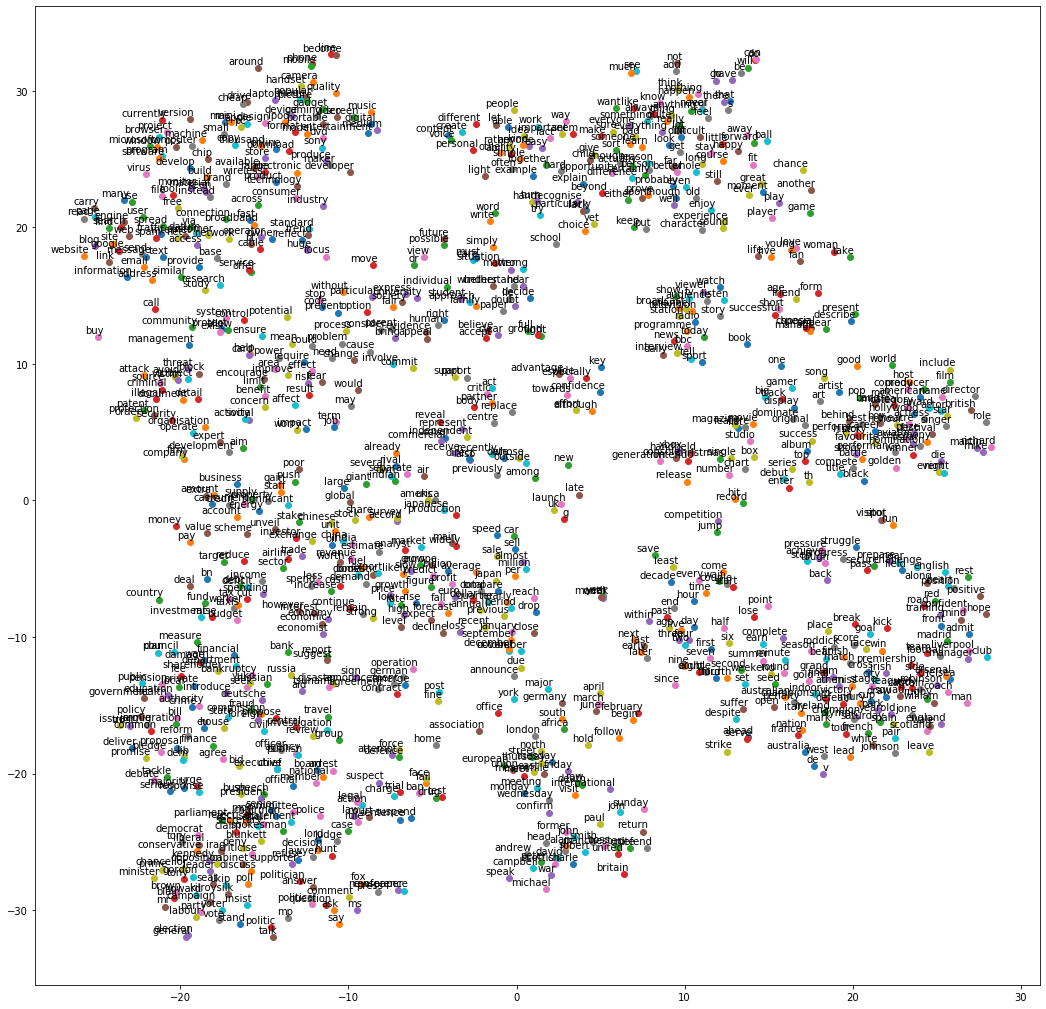

In [83]:

import matplotlib.pyplot as plt
def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
   
tsne_plot(w2v_model)